In [4]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df=pd.read_csv('C:/Users/kushal/Documents/Kmeans.csv')

In [13]:
df=df.drop('Unnamed: 0',axis=1)

In [14]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Text(0, 0.5, 'Income')

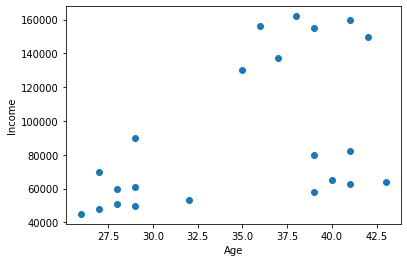

In [17]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income")

In [18]:
km=KMeans(n_clusters=3)

In [19]:
km

KMeans(n_clusters=3)

In [21]:
y_predict=km.fit_predict(df[['Age','Income($)']])

In [22]:
df['Cluster']=y_predict

In [23]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [24]:
df1=df[df['Cluster']==0]
df2=df[df['Cluster']==1]
df3=df[df['Cluster']==2]

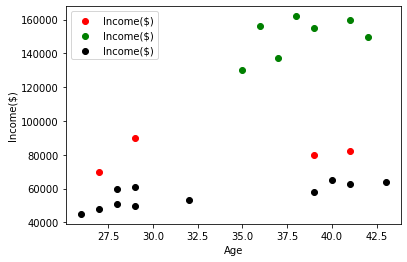

In [29]:
plt.scatter(df1['Age'],df1['Income($)'],color='red',label='Income($)')
plt.scatter(df2['Age'],df2['Income($)'],color='green',label='Income($)')
plt.scatter(df3['Age'],df3['Income($)'],color='black',label='Income($)')
plt.xlabel("Age")
plt.ylabel('Income($)')
plt.legend()

In [36]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])




df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [38]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted
df['Cluster_scaling']=y_predicted
df

,Name,Age,Income($),Cluster,Cluster_scaling
0,Rob,0.058824,0.213675,0,1
1,Michael,0.176471,0.384615,0,1
2,Mohan,0.176471,0.136752,2,1
3,Ismail,0.117647,0.128205,2,1
4,Kory,0.941176,0.897436,1,0
5,Gautam,0.764706,0.940171,1,0
6,David,0.882353,0.982906,1,0
7,Andrea,0.705882,1.000000,1,0
8,Brad,0.588235,0.948718,1,0
9,Angelina,0.529412,0.726496,1,0


df1=df[df['Cluster']==0]
df2=df[df['Cluster']==1]
df3=df[df['Cluster']==2]
plt.scatter(df1['Age'],df1['Income($)'],color='red',label='Income($)')
plt.scatter(df2['Age'],df2['Income($)'],color='green',label='Income($)')
plt.scatter(df3['Age'],df3['Income($)'],color='black',label='Income($)')
plt.xlabel("Age")
plt.ylabel('Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',label='centroid',color='purple')
plt.legend()

In [47]:
km.cluster_centers_[:,0]

array([0.72268908, 0.1372549 , 0.85294118])

In [46]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [50]:
k_rng=range(1,11)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
    

    

In [51]:
sse

[5.434011511988182,
 2.0911363886990797,
 0.4750783498553077,
 0.34910470944195493,
 0.26217927623452053,
 0.22443334487241348,
 0.16858512236029688,
 0.13781880133763993,
 0.10383752586603513,
 0.08510915216361317]

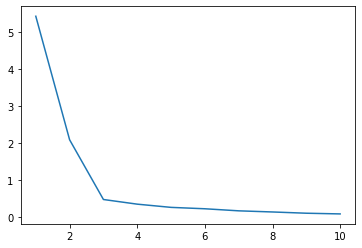

In [52]:
plt.plot(k_rng,sse)